In [4]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [10]:
df = pd.read_csv(r"C:\Users\sivap\Downloads\delivery_logs.csv")

df['pickup_time'] = pd.to_datetime(df['pickup_time'])
df['dropoff_time'] = pd.to_datetime(df['dropoff_time'])

df.head()

,delivery_id,pickup_time,dropoff_time
0,1,2024-01-01 10:00:00,2024-01-01 10:40:00
1,2,2024-01-01 11:00:00,2024-01-01 11:55:00
2,3,2024-01-02 09:30:00,2024-01-02 10:10:00
3,4,2024-01-03 18:00:00,2024-01-03 19:05:00
4,5,2024-01-06 12:00:00,2024-01-06 13:10:00


In [11]:
df['delivery_time_minutes'] = (
    df['dropoff_time'] - df['pickup_time']
).dt.total_seconds() / 60

df.head()

,delivery_id,pickup_time,dropoff_time,delivery_time_minutes
0,1,2024-01-01 10:00:00,2024-01-01 10:40:00,40.0
1,2,2024-01-01 11:00:00,2024-01-01 11:55:00,55.0
2,3,2024-01-02 09:30:00,2024-01-02 10:10:00,40.0
3,4,2024-01-03 18:00:00,2024-01-03 19:05:00,65.0
4,5,2024-01-06 12:00:00,2024-01-06 13:10:00,70.0


In [12]:
df['day_of_week'] = df['pickup_time'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

df.head()

,delivery_id,pickup_time,dropoff_time,delivery_time_minutes,day_of_week,is_weekend
0,1,2024-01-01 10:00:00,2024-01-01 10:40:00,40.0,0,0
1,2,2024-01-01 11:00:00,2024-01-01 11:55:00,55.0,0,0
2,3,2024-01-02 09:30:00,2024-01-02 10:10:00,40.0,1,0
3,4,2024-01-03 18:00:00,2024-01-03 19:05:00,65.0,2,0
4,5,2024-01-06 12:00:00,2024-01-06 13:10:00,70.0,5,1


In [13]:
features = df.groupby('delivery_id').agg(
    avg_time=('delivery_time_minutes', 'mean'),
    variance_time=('delivery_time_minutes', 'var'),
    weekend_ratio=('is_weekend', 'mean')
).reset_index()

features.fillna(0, inplace=True)
features.head()

,delivery_id,avg_time,variance_time,weekend_ratio
0,1,40.0,0.0,0.0
1,2,55.0,0.0,0.0
2,3,40.0,0.0,0.0
3,4,65.0,0.0,0.0
4,5,70.0,0.0,1.0


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(
    features[['avg_time', 'variance_time', 'weekend_ratio']]
)

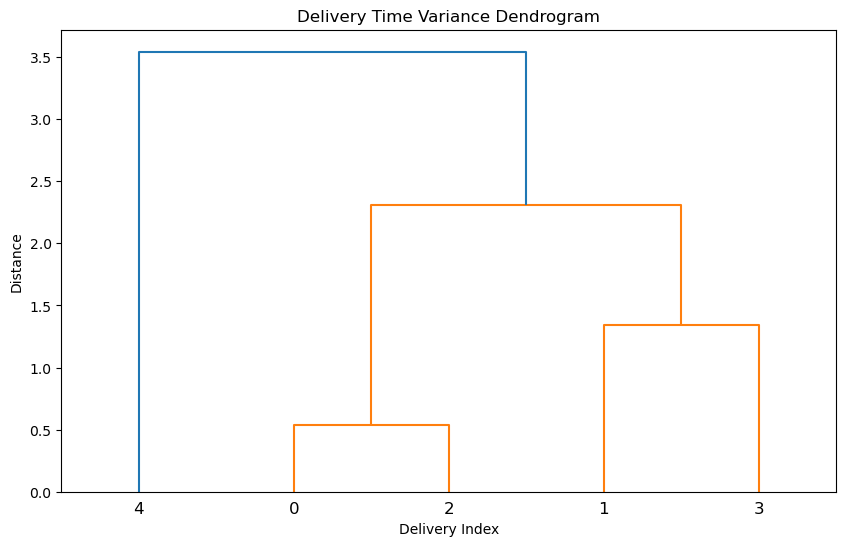

In [29]:
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Delivery Time Variance Dendrogram")
plt.xlabel("Delivery Index")
plt.ylabel("Distance")
plt.show()

In [18]:
df = pd.read_csv(r"C:\Users\sivap\Downloads\delivery_logs.csv")

df['pickup_time'] = pd.to_datetime(df['pickup_time'])
df['dropoff_time'] = pd.to_datetime(df['dropoff_time'])

df.head()

,delivery_id,pickup_time,dropoff_time
0,1,2024-01-01 10:00:00,2024-01-01 10:40:00
1,2,2024-01-01 11:00:00,2024-01-01 11:55:00
2,3,2024-01-02 09:30:00,2024-01-02 10:10:00
3,4,2024-01-03 18:00:00,2024-01-03 19:05:00
4,5,2024-01-06 12:00:00,2024-01-06 13:10:00


In [20]:
df['delivery_time_minutes'] = (
    df['dropoff_time'] - df['pickup_time']
).dt.total_seconds() / 60

In [21]:
df['day_type'] = df['pickup_time'].dt.weekday

In [22]:
X = df[['delivery_time_minutes', 'day_type']]

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
from scipy.cluster.hierarchy import linkage

linked = linkage(X_scaled, method='ward')

In [27]:
from scipy.cluster.hierarchy import fcluster

# Create 3 clusters
df['cluster'] = fcluster(linked, t=3, criterion='maxclust')

df

,delivery_id,pickup_time,dropoff_time,delivery_time_minutes,day_type,cluster
0,1,2024-01-01 10:00:00,2024-01-01 10:40:00,40.0,0,1
1,2,2024-01-01 11:00:00,2024-01-01 11:55:00,55.0,0,2
2,3,2024-01-02 09:30:00,2024-01-02 10:10:00,40.0,1,1
3,4,2024-01-03 18:00:00,2024-01-03 19:05:00,65.0,2,2
4,5,2024-01-06 12:00:00,2024-01-06 13:10:00,70.0,5,3


In [30]:
# Delivery duration in minutes
df['delivery_duration'] = (df['dropoff_time'] - df['pickup_time']).dt.total_seconds() / 60

df[['pickup_time', 'dropoff_time', 'delivery_duration']].head()

,pickup_time,dropoff_time,delivery_duration
0,2024-01-01 10:00:00,2024-01-01 10:40:00,40.0
1,2024-01-01 11:00:00,2024-01-01 11:55:00,55.0
2,2024-01-02 09:30:00,2024-01-02 10:10:00,40.0
3,2024-01-03 18:00:00,2024-01-03 19:05:00,65.0
4,2024-01-06 12:00:00,2024-01-06 13:10:00,70.0


In [31]:
cluster_summary = df.groupby('cluster').agg(
    avg_delivery_time=('delivery_duration', 'mean'),
    variance_delivery_time=('delivery_duration', 'var'),
    count=('delivery_duration', 'count')
)

cluster_summary

,avg_delivery_time,variance_delivery_time,count
cluster,,,
1,40.0,0.0,2
2,60.0,50.0,2
3,70.0,NaN,1


In [32]:
df.to_csv("delivery_clustered_output.csv", index=False)